# Извештај за проект
## Моделирање и симулација 2018/2019
### Андреј Јанчевски 151003

# Модел за рата на хемиски реакции

## 1. Вовед
**Хемиска реакција** се дефинира како процес кој доведува до хемиска трансформација на едно множество супстанци во друго множество на супстанци. Овие процеси вклучуваат само размена на електрони меѓу атомите, а не и на атомски јадра. Преку размената на електрони, некои хемиски врски меѓу атомите се раскинуваат, а нови се формираат.
Секоја хемиска реакција може да се претстави со соодветна **хемиска равенка**. Општата форма на вакви равенки е следната:
$$c_{1}R_{1}+c_{2}R_{2}+\dots+c_{m}R_{m}=d_{1}P_{1}+d_{2}P_{2}+\dots+d_{n}P_{n}$$

Супстанците од левата страна на равенката, $R_{1},R_{2},\dots,R_{m}$, се нарекуваат **реактанти**, а тие од десната страна,$P_{1},P_{2},\dots,P_{n}$, **продукти**. Сите супстанци-учесници во реакцијата со едно име се нарекуваат **реагенси**.
Пред секој од реагенсите придружени се т.н. *стохиометриски коефициенти*, $c_{1},c_{2},\dots,c_{m},d_{1},d_{2},\dots,d_{n}$. Со помош на овие коефициенти означуваме во каков **однос** треба да бидат количините на секоја од супстанциите во реакцијата.

Стохиометриските коефициенти за некоја реакција на почеток не се познати и потребно е да се пресметаат со алгоритам за **балансирање на хемиски равенки**. 

## 2. Балансирање на хемиска равенка
За да ги одредиме коефициентите пред секој реагенс во равенката потребно е да ја знаеме хемиската формула на молекулата на секој од реагенсите. Општа форма на ваква формула претставува:
$$[E_{1}]_{\alpha_{1}}[E_{2}]_{\alpha_{2}}\dots[E_{k}]_{\alpha_{k}}$$
$E_1, E_{2},\dots, E_{k}$ претставуваат **хемиски елементи** т.е. имињата на атомите од кои е составена молекулата.
Кон секој елемент е придружен **индекс** $\alpha_{1},\alpha_{2},\dots,\alpha_{k}$, кој означува колку атоми од тој елемент се дел од молекулата. Овие индекси се клучни за балансирање на хемиската равенката.

Небалансирана форма на некоја хемиска равенка претставува равенката во која се изоставени стохиометриските коефициенти:
$$\sum_{i=1}^{m}R_{i}=\sum_{j=1}^{n}P_{i}$$
Целта на балансирањето е да се одредат коефициенти $c_{1},c_{2},\dots,c_{m},d_{1},d_{2},\dots,d_{n}$ т.ш. за секој хемиски елемент кој се појавува во реакцијата бројот на атоми од тој елемент од левата страна на равенката ќе биде еднаков со бројот на атоми од тој елемент во десната страна на равенката, или формално:
$$\sum_{i=1}^{m}\sum_{k=1}^{K}c_{i}A_{ki}=\sum_{j=m+1}^{m+n}\sum_{k=1}^{K}d_{j-m}A_{kj}$$,
каде што бројот $K$ означува колку вкупно **различни** хемиски елементи се присутни во реакцијата, а во матрицата $А$ со димензии $K\times(m+n)$ на позиција $i,j$ чуваме колку атоми од елементот $i$ има во реагенсот $j$.

Значи, ако коефициентите ги подредиме во вектор $x=[c_{1} \dots c_{m} (-d_{1}) \dots (-d_{n})]$ со димензии $(m+n) \times 1$, тогаш лесно може да ги добиеме нивните вредности со решавање на матричната равенка:
$$Ax=b$$
$$x=A^{-1}b$$
За крај, треба да се напомене дека за да има системот од равенки решение секогаш еден од коефициентите, најчесто првиот $c_{1}$, мора да го поставиме на $1$ бидејќи тој претставува референтна точка за формирање на односите со другите количини на супстанца. Векторот $b$ всушност се добива кога од вектор со сите вредности еднакви на $0$ ќе го одземеме бројот на атоми на секој од елементите во првиот реактант.

## 2.5 Имплементација на симулатор за балансирање хемиски равенки

In [1]:
from chem_equation import ChemicalEquation

### Пример 1

In [2]:
eq1 = ChemicalEquation()
eq1.add_reactant("H2")
eq1.add_reactant("O2")
eq1.add_product("H2O1")
print(eq1)
eq1.balance_equation(verbose=True)
print(eq1)

H2 + O2 = H2O
A = 
 [[ 0 -2]
 [ 2 -1]]
b =  [-2  0]
H2 + 0.5 O2 = H2O


### Пример 2

In [3]:
eq2 = ChemicalEquation()
eq2.add_reactant("Na1O1H1")
eq2.add_reactant("H2S1O4")
eq2.add_product("Na2S1O3")
eq2.add_product("H2O1")
print(eq2)
eq2.balance_equation(verbose=True)
print(eq2)

NaOH + H2SO4 = Na2SO3 + H2O
A = 
 [[ 1  2  0 -2]
 [ 1  0 -2  0]
 [ 1  4 -3 -1]
 [ 0  1 -1  0]]
b =  [0 0 0 0]
NaOH + H2SO4 = Na2SO3 + H2O


### Пример 3

In [4]:
eq3 = ChemicalEquation()
eq3.add_reactant("C6H12O6")
eq3.add_reactant("O2")
eq3.add_product("C1O2")
eq3.add_product("H2O1")
print(eq3)
eq3.balance_equation(verbose=True)
print(eq3)

C6H12O6 + O2 = CO2 + H2O
A = 
 [[ 0  0 -2]
 [ 2 -2 -1]
 [ 0 -1  0]]
b =  [-12  -6  -6]
C6H12O6 + 6.0 O2 = 6.0 CO2 + 6.0 H2O


### Пример 4

In [5]:
eq4 = ChemicalEquation()
eq4.add_reactant("S1O2")
eq4.add_reactant("K1Mn1O4")
eq4.add_reactant("H2O1")
eq4.add_product("Mn1S1O4")
eq4.add_product("K2S1O4")
eq4.add_product("H2S1O4")
print(eq4)
eq4.balance_equation(verbose=True)
print(eq4)

SO2 + KMnO4 + H2O = MnSO4 + K2SO4 + H2SO4
A = 
 [[ 0  2  0  0 -2]
 [ 4  1 -4 -4 -4]
 [ 1  0  0 -2  0]
 [ 1  0 -1  0  0]
 [ 0  0 -1 -1 -1]]
b =  [ 0 -2  0  0 -1]
SO2 + 0.4 KMnO4 + 0.4 H2O = 0.4 MnSO4 + 0.2 K2SO4 + 0.4 H2SO4


## 3. Едноставен линеарен модел на рата на хемиска реакција
Хемиските реакции не почнуваат и завршуваат одеднаш. Потребно е одредено време за почетната количина на реактанти кои ќе ги внесеме во системот да реагираат комплетно, продуцирајќи одредена количина на продуктите. Ова време зависи од величината која се нарекува **рата/брзина на хемиска реакција** и ќе ја означуваме со $\kappa$. Преостанатиот дел од овој проект ќе се состои во претставувајќи различни модели за симулирање на вредноста на оваа величина, а со тоа и текот на хемиската реакција.

Најелементарен модел кој може да го предложиме е модел кој е базиран на претпоставката дека во секој чекор на реакцијата константна количина од секој реактант се троши за да се произведе константна количина од секој продукт. Овие количини на реагенсите се пропорционални со нивните стохиометриските коефициенти и константа $\kappa_{R}$ која го означува делот од ратата на реакција кој зависи од други параметри, како хемиските својства на реагенсите, температурата и притисокот на системот и др.

Формална дефиниција на моделот:
- Променливи:
    - $t$ - независна променлива, го означува изминатото време од почетокот на реакцијата
    - $R_{i}(t)$ - количината супстанца од реактантот $i$ во време $t$, $i\in\{1,..,m\}$
    - $P_{j}(t)$ - количината супстанца од продуктот $ј$ во време $t$, $ј\in\{1,..,n\}$
- Параметри и константи:
    - $\kappa_{R}$ - делот од ратата на реакција кој зависи од други параметри
    - $c_{i}$ - стохиометриски коефициент за реактантот $i$
    - $d_{j}$ - стохиометриски коефициент за продуктот $j$
    - $R_{i}^{0}=R_{i}(t=0)$ - почетна количина од реактантот $i$
- Диференцијални равенки:   
$$\frac{dR_{i}}{dt}=-\kappa_{R}c_{i}$$
$$\frac{dP_{j}}{dt}=\kappa_{R}d_{j}$$
- Почетни услови:
$$R_{i}(0)=R_{i}^{0}$$
$$P_{j}(0)=0$$
- Овие равенки можат да се решат аналитички:
$$R_{i}(t)=-\kappa_{R}c_{i}t + C_{i}$$
$$P_{j}(t)=\kappa_{R}d_{j}t + D_{j}$$
- Користејќи ги почетните услови може да се определат константите на интеграција $C_{i}$ и $D_{j}$, добивајќи ја финалната форма на моделот:
$$R_{i}(t)=R_{i}^{0}-\kappa_{R}c_{i}t$$
$$P_{j}(t)=\kappa_{R}d_{j}t$$

## 3.5 Имплементација на симулатор за моделот и пример реакции

In [6]:
from chem_reaction import ChemicalReaction

### Пример 1

H2 + 0.5 O2 = H2O


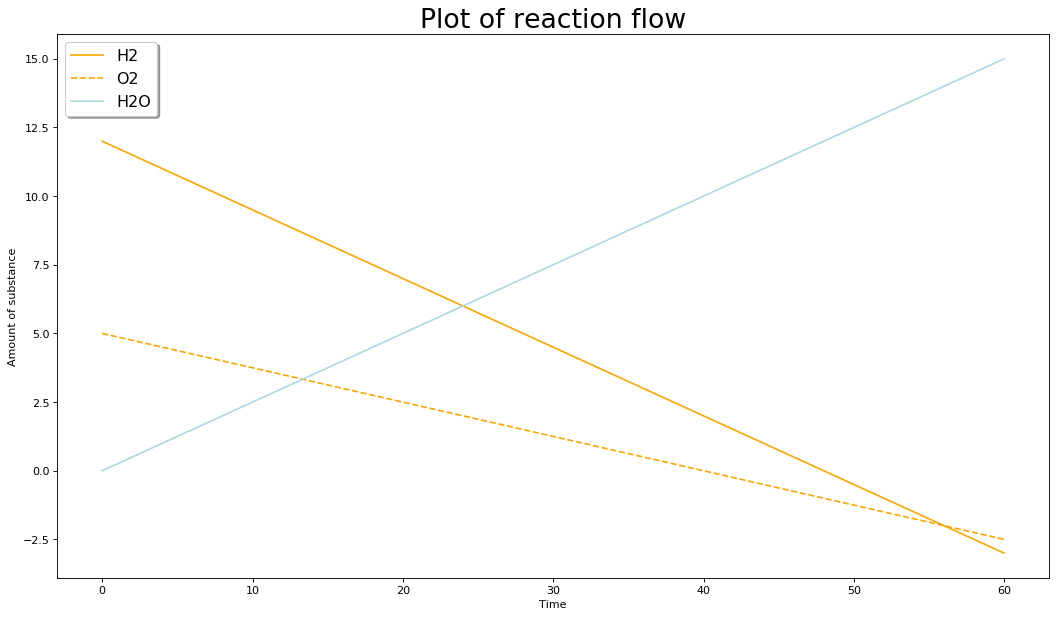

In [7]:
print(eq1)
r1 = ChemicalReaction(eq1, forward_rate=0.25)
reaction_data = r1.calculate_simple_linear_reaction_model([12, 5], max_time=60)
r1.plot_reaction(*reaction_data)

### Пример 2

SO2 + 0.4 KMnO4 + 0.4 H2O = 0.4 MnSO4 + 0.2 K2SO4 + 0.4 H2SO4


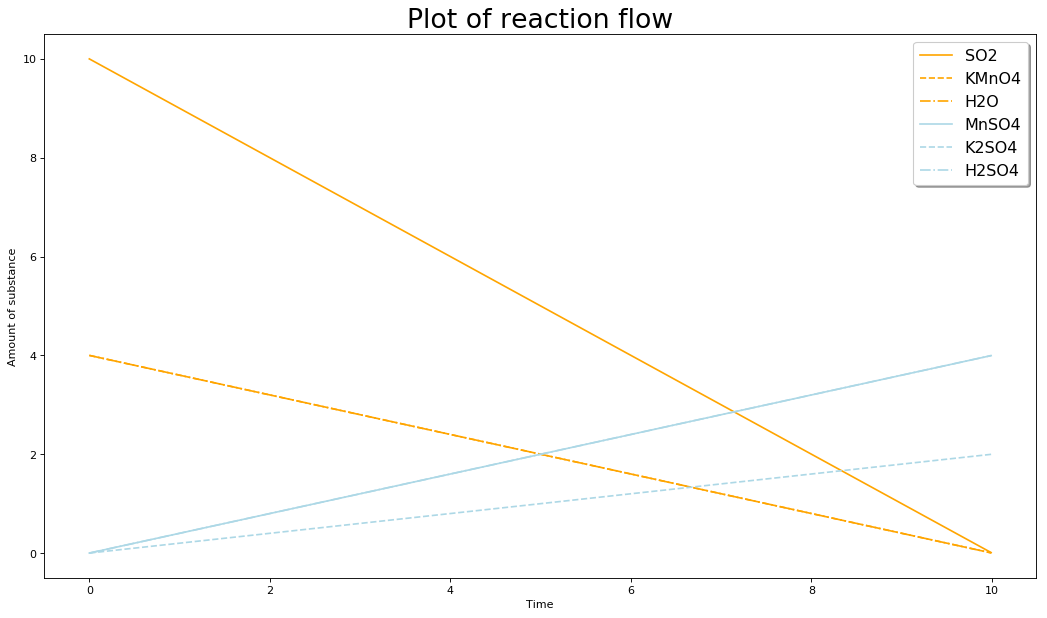

In [8]:
print(eq4)
r4 = ChemicalReaction(eq4, forward_rate=1)
reaction_data = r4.calculate_simple_linear_reaction_model([10, 4, 4],
                                                          max_time=10)
r4.plot_reaction(*reaction_data)

## 4. Подобрен експоненцијален модел на рата на хемиска реакција
Претходниот модел има неколку многу големи недостатоци кои може веднаш да се согледаат од примерите:
- Количината на секој од реактантите со текот на времето може да падне под нулата и да стане негативен број, а количината на продуктите теоретски може да тежи кон бесконечност. Се разбира, во природата тоа не е така. Посакувано однесување на моделот е како што се одвива реакцијата количината на реактантите да тежи кон 0, а количината на продуктите да тежи кон максималната количина што може да се произведе и оваа количина ќе зависи од почетната внесена количина на реактанти.
- Дури и кога реактантите не се во бараниот однос, како на пр. во првиот пример кога односот меѓу водород и кислород во системот на почетокот е 12:5, а треба да биде 2:1, реакцијата сепак се одвива со истата рата и повторно количината на водород целосно се истрошува (и оди во негатива). Во реалност ќе постои одредена количина водород која нема да реагира со кислородот бидејќи ќе претставува вишок.
- Со текот на реакцијата таа треба да се одвива со рата која постојано опаѓа, бидејќи што помала количина на реактанти е присутна, толку е помала веројатноста молекулите да реагираат.

Со модификација на претходниот модел може да ги елиминираме сите недостатоци:

- Променливи:
    - $t$ - независна променлива, го означува изминатото време од почетокот на реакцијата
    - $R_{i}(t)$ - количината супстанца од реактантот $i$ во време $t$, $i\in\{1,..,m\}$
    - $P_{j}(t)$ - количината супстанца од продуктот $ј$ во време $t$, $ј\in\{1,..,n\}$
- Параметри и константи:
    - $\kappa_{R}$ - делот од ратата на реакција кој зависи од други параметри
    - $c_{i}$ - стохиометриски коефициент за реактантот $i$
    - $d_{j}$ - стохиометриски коефициент за продуктот $j$
    - $R_{i}^{0}=R_{i}(t=0)$ - почетна количина од реактантот $i$
    - $\mu_{R} = \min_{i}{\frac{R_{i}^{0}}{c_{i}}}$ - параметар кој ќе го наречеме **минимален реактантен однос**, го означува минималниот размер на количини реактанти кои можат да реагираат за да се задоволи односот меѓу стохиометриските коефициенти
    - $R_{i}^{*}=R_{i}(t \to +\infty)$ - конечната преостаната количина на реактантот $i$
    - $P_{j}^{*}=P_{j}(t \to +\infty)$ - конечната преостаната количина на продуктот $j$
- Прво ги пресметуваме теоретските конечни количини:
$$R_{i}^{*}=R_{i}^{0}-\mu_{R}c_{i}$$
$$P_{j}^{*}=\mu_{R}d_{j}$$
- Ги модифицираме диференцијалните равенки т.ш. сега изводот на количината на реактантите зависи линеарно од **преостанатата нереагирана количина**, а кај продуктите од **преостанатата непроизведена количина**:   
$$\frac{dR_{i}}{dt}=-\kappa_{R}c_{i}(R_{i}-R_{i}^{*})$$
$$\frac{dP_{j}}{dt}=\kappa_{R}d_{j}(P_{j}^{*}-P_{j})$$
- Почетни услови:
$$R_{i}(0)=R_{i}^{0}$$
$$\lim_{t \to \infty}R_{i}(t)=R_{i}^{*}$$
$$P_{j}(0)=0$$
$$\lim_{t \to \infty}P_{j}(t)=P_{j}^{*}$$
- Овие равенки повторно можат да се решат аналитички:
$$R_{i}(t)= R_{i}^{*}+C_{i}e^{-\kappa_{R}c_{i}t}$$
$$P_{j}(t)=P_{j}^{*}+D_{j}e^{-\kappa_{R}d_{j}t}$$
- Користејќи ги почетните услови може да се определат константите на интеграција $C_{i}$ и $D_{j}$, добивајќи ја финалната форма на моделот:
$$C_{i}=R_{i}^{0}-R_{i}^{*}=\mu_{R}c_{i}$$
$$D_{j}=P_{j}^{0}-P_{j}^{*}=-P_{j}^{*}$$
$$R_{i}(t)= R_{i}^{*}+\mu_{R}c_{i}e^{-\kappa_{R}c_{i}t}$$
$$P_{j}(t)=P_{j}^{*}-P_{j}^{*}e^{-\kappa_{R}d_{j}t}$$

## 4.5 Имплементација на симулатор за моделот и пример реакции

### Пример 1

H2 + 0.5 O2 = H2O


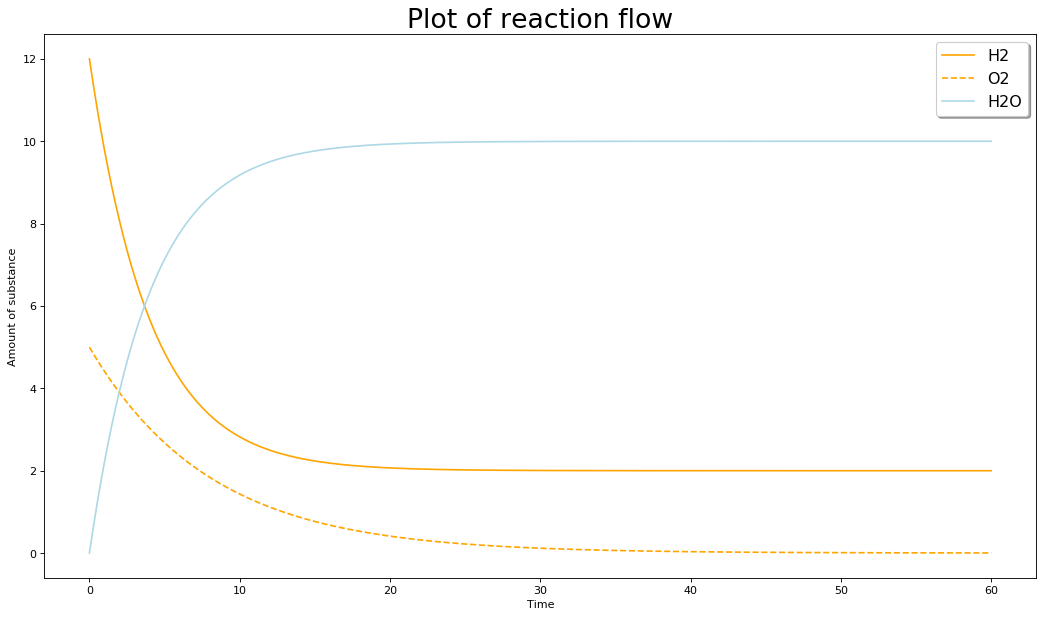

In [9]:
print(eq1)
r1 = ChemicalReaction(eq1, forward_rate=0.25)
reaction_data = r1.calculate_simple_exponential_reaction_model([12, 5],
                                                               max_time=60)
r1.plot_reaction(*reaction_data)

### Пример 2

SO2 + 0.4 KMnO4 + 0.4 H2O = 0.4 MnSO4 + 0.2 K2SO4 + 0.4 H2SO4


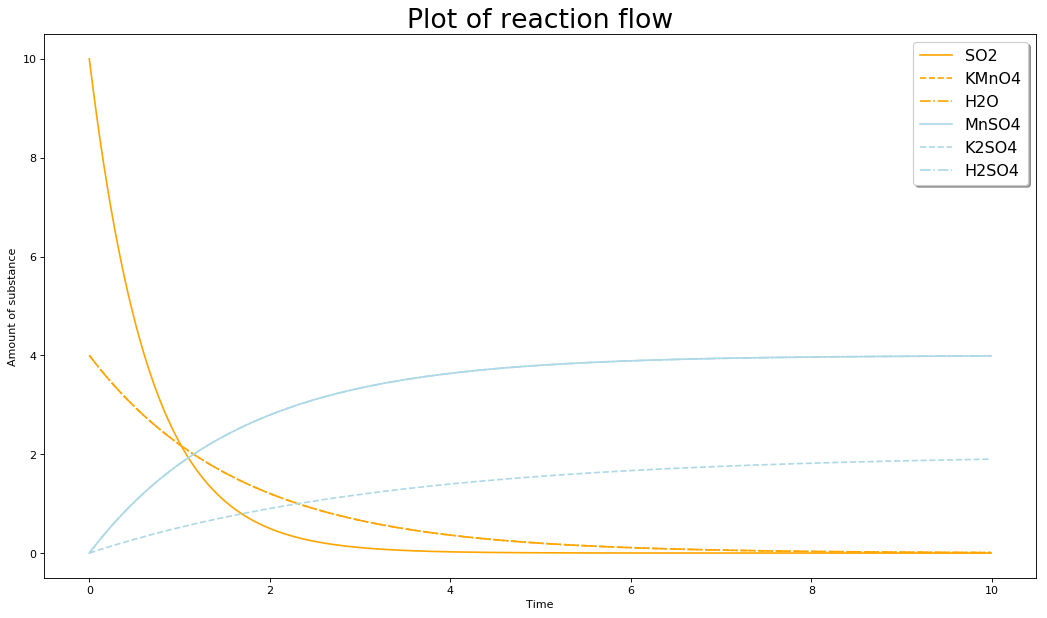

In [10]:
print(eq4)
r4 = ChemicalReaction(eq4, forward_rate=1.5)
reaction_data = r4.calculate_simple_exponential_reaction_model([10, 4, 4],
                                                               max_time=10)
r4.plot_reaction(*reaction_data)

## 5. Финален рамнотежен модел на рата на хемиска реакција
Согледувајќи ги примерите забележуваме дека моделот одлично ја претставува реалноста и не се однесува спротивно од очекуваното.
Но сепак, постои еден аспект на хемиските реакции што не е опфатен засега. Имено, постојат два типа на хемиски реакции: **реверзибилни** и **нереверзибилни**. Претходно моделиравме само реакции од вториот тип т.е. реакции кои се одвиваат само во една насока, од реактанти кон продукти, едните се трошат а другите се проиведуваат. Но, постојат реакции во кој двете насоки на хемиската равенка може да се одвиваат симултано т.е. произведените продукти посебно да реагираат и да произведат реактанти.

Ваквиот механизам е многу покомплексен и вклучува нешто што се нарекува **рамнотежна состојба / еквилибриум** во хемијата. Експериментално е согледано дека постојат реакции во кои односот меѓу вкупната количина на реактанти наспрема продукти тежи кон константа со текот на одвивањето на реакцијата. Количините на реагенсите веќе не се менуваат исто како кај претходниот модел, но сега реакцијата всушност не престанува туку нејзината рата престанува да се менува и добиваме балансиран систем.

За да го модифираме претходниот модел за да може да моделира еквилибриум всушност треба да направиме само две промени:
- Сите параметри и равенки потребно е да се направат „симетрични“ во однос на зависноста од реактантите и продуктите
- Сега параметрите на минималните реакциски односи и конечните количини преминуваат во променливи бидејќи ќе зависат од времето, сега тие претставуваат предвидувања на моделот за тоа како ќе изгледа рамнотежната состојба

- Променливи:
    - $t$ - независна променлива, го означува изминатото време од почетокот на реакцијата
    - $R_{i}(t)$ - количината супстанца од реактантот $i$ во време $t$, $i\in\{1,..,m\}$
    - $P_{j}(t)$ - количината супстанца од продуктот $ј$ во време $t$, $ј\in\{1,..,n\}$
    - $\mu_{R}(t) = \min_{i}{\frac{R_{i}(t)}{c_{i}}}$ - **моментален минимален реактантен однос**
    - $\mu_{P}(t) = \min_{j}{\frac{P_{j}(t)}{d_{j}}}$ - **моментален минимален продуктен однос**
    - $R_{i}^{*}(t)$ - **моментално предвидување за конечната количина на реактантот** $i$
    - $P_{j}^{*}(t)$ - **моментално предвидување за конечната количина на продуктот** $j$
- Параметри и константи:
    - $\kappa_{R}$ - делот од ратата на реакцијата **во оригиналната насока** кој зависи од други параметри
    - $\kappa_{P}$ - делот од ратата на реакцијата **во обратната насока** кој зависи од други параметри
    - $c_{i}$ - стохиометриски коефициент за реактантот $i$
    - $d_{j}$ - стохиометриски коефициент за продуктот $j$
    - $R_{i}^{0}=R_{i}(t=0)$ - почетна количина од реактантот $i$
- Во секој чекор ги предвидуваме конечните количини:
$$R_{i}^{*}(t)=R_{i}^{0}-c_{i}\mu_{R}(t)+c_{i}\mu_{P}(t)$$
$$P_{j}^{*}(t)=d_{j}\mu_{R}(t)-d_{j}\mu_{P}(t)$$
- Ги правиме диференцијалните равенки „симетрични“:   
$$\frac{dR_{i}}{dt}=-\kappa_{R}c_{i}(R_{i}-R_{i}^{*})+\kappa_{P}c_{i}(R_{i}^{*}-R_{i})$$
$$\frac{dP_{j}}{dt}=\kappa_{R}d_{j}(P_{j}^{*}-P_{j})-\kappa_{P}d_{j}(P_{j}-P_{j}^{*})$$
- Почетни услови:
$$R_{i}(0)=R_{i}^{0}$$
$$\lim_{t \to \infty}R_{i}(t)=R_{i}^{*}$$
$$P_{j}(0)=0$$
$$\lim_{t \to \infty}P_{j}(t)=P_{j}^{*}$$
- Овие равенки повторно можат да се решат аналитички:
$$R_{i}(t)= R_{i}^{*}-C_{i}e^{-(\kappa_{R}+\kappa_{P})c_{i}t}$$
$$P_{j}(t)=P_{j}^{*}-D_{j}e^{-(\kappa_{R}+\kappa_{P})d_{j}t}$$
- Користејќи ги почетните услови може да се определат константите на интеграција $C_{i}$ и $D_{j}$, добивајќи ја финалната форма на моделот:
$$C_{i}=R_{i}^{*}-R_{i}$$
$$D_{j}=P_{j}^{*}-P_{j}$$
$$R_{i}(t)= R_{i}^{*}-(R_{i}^{*}-R_{i})e^{-(\kappa_{R}+\kappa_{P})c_{i}t}$$
$$P_{j}(t)=P_{j}^{*}-(P_{j}^{*}-P_{j})e^{-(\kappa_{R}+\kappa_{P})d_{j}t}$$

## 5.5 Имплементација на симулатор за моделот и пример реакции

### Пример 1

SO2 + 0.4 KMnO4 + 0.4 H2O = 0.4 MnSO4 + 0.2 K2SO4 + 0.4 H2SO4


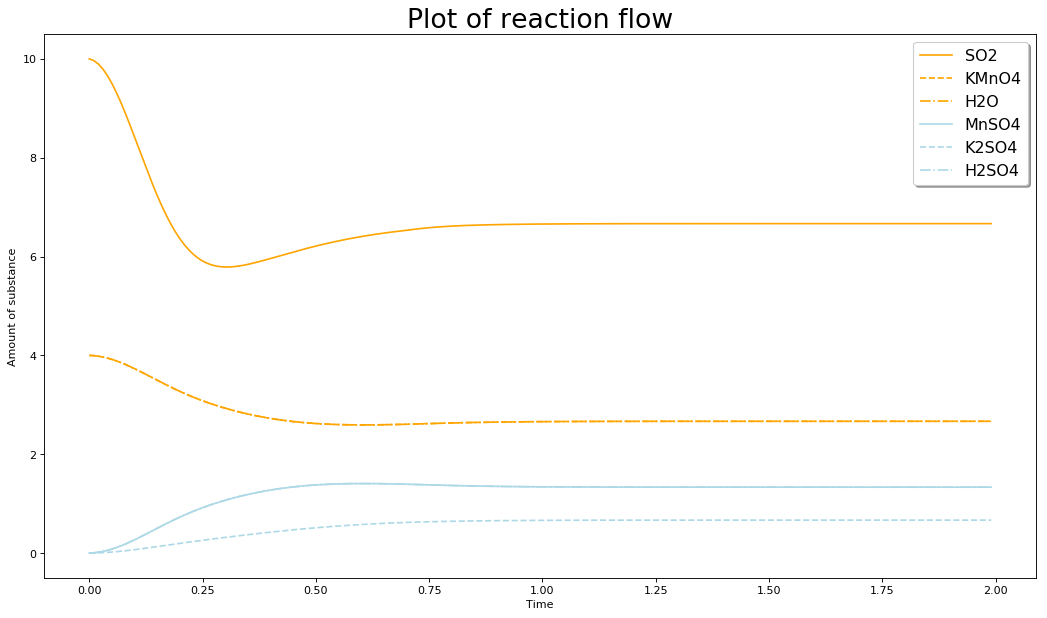

In [11]:
print(eq4)
r4 = ChemicalReaction(eq4, forward_rate=0.25, reverse_rate=0.1)
reaction_data = r4.calculate_equilibrium_exponential_reaction_model([10, 4, 4],
                                                                    max_time=2)
r4.plot_reaction(*reaction_data)

### Пример 2

SO2 + 0.4 KMnO4 + 0.4 H2O = 0.4 MnSO4 + 0.2 K2SO4 + 0.4 H2SO4


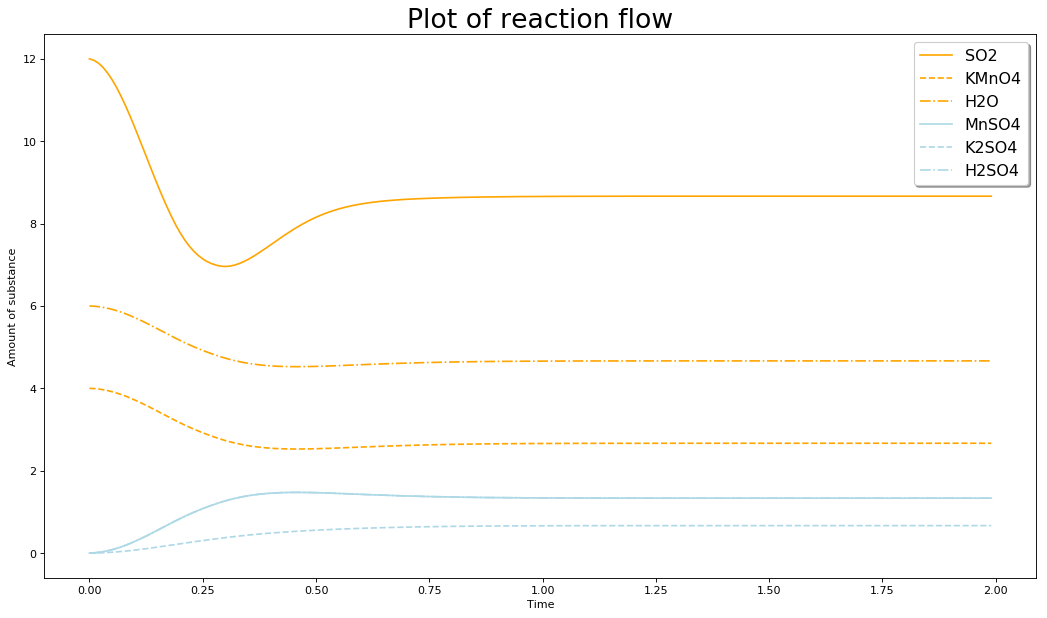

In [12]:
print(eq4)
r4 = ChemicalReaction(eq4, forward_rate=0.25, reverse_rate=0.1)
reaction_data = r4.calculate_equilibrium_exponential_reaction_model([12, 4, 6],
                                                                    max_time=2)
r4.plot_reaction(*reaction_data)

## Анализа на зависноста на рамнотежната положба од односот на ратите

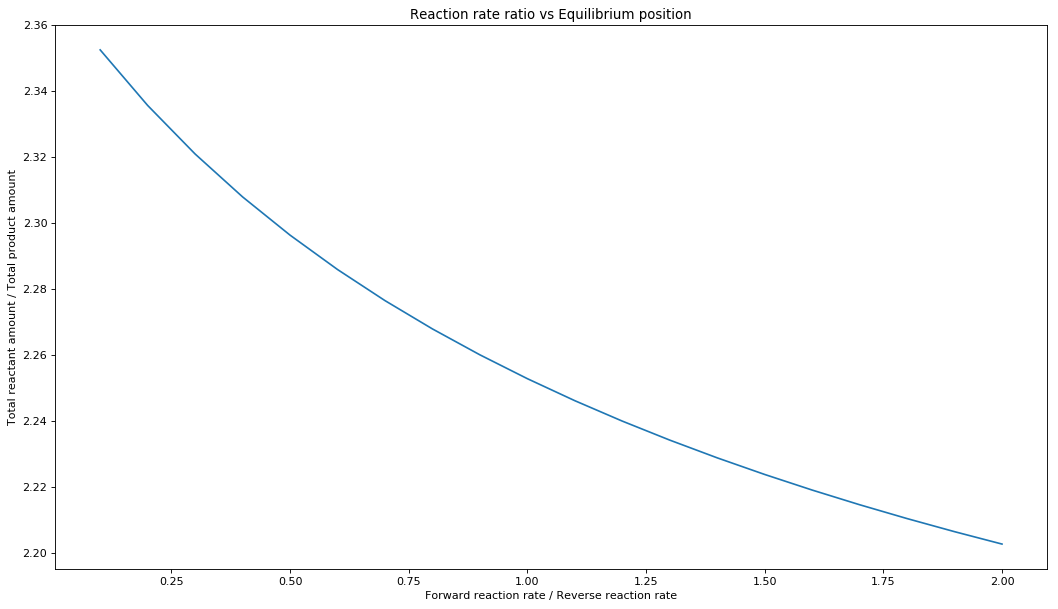

In [13]:
import numpy as np
from matplotlib import pyplot as plt
equilibriums = []
for rate_ratio in np.arange(0.1, 2.1, 0.1):
    r4 = \
    ChemicalReaction(eq4, forward_rate=0.25, reverse_rate=0.25 * rate_ratio)
    _, reactant_amounts, product_amounts = \
    r4.calculate_equilibrium_exponential_reaction_model([10, 4, 4], max_time=2)
    num_samples = len(reactant_amounts)
    final_reactant_amounts = reactant_amounts[num_samples - 1]
    final_product_amounts = product_amounts[num_samples - 1]
    total_reactant_amount = sum(final_reactant_amounts)
    total_product_amount = sum(final_product_amounts)
    equilibrium = total_reactant_amount / total_product_amount
    equilibriums.append(equilibrium)

plt.figure(figsize=(16, 9), dpi=1280 // 16)
plt.title("Reaction rate ratio vs Equilibrium position")
plt.plot(np.arange(0.1, 2.1, 0.1), equilibriums)
plt.xlabel("Forward reaction rate / Reverse reaction rate")
plt.ylabel("Total reactant amount / Total product amount")
plt.show()